In [1]:
#Evaluacion 2

In [2]:
#!pip install fiona


In [3]:
#Asignamos nombres a las carpetas de los paises, para que puedan ser leidas y son las siguientes: paises,rios y ciudades.
import os, geopandas as gpd
countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [4]:
countries.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
#Asigno un nombre para el mapa del pais seleccionado, en este caso Chile
india=countries[countries.COUNTRY=='India']

In [8]:
#!pip install matplotlib

C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

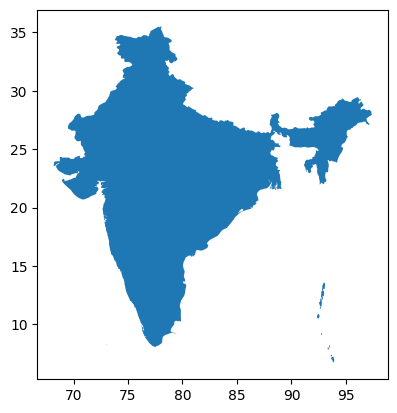

In [9]:
#Proyecto el mapa del pais
india.plot()

<Axes: >

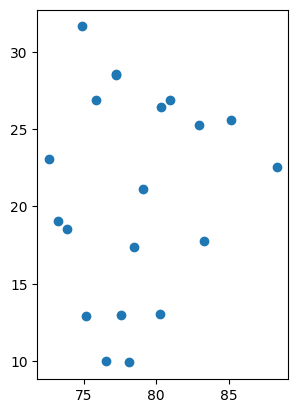

In [10]:
#Proyectamos las ciudades de India
cities_india=cities[cities.COUNTRY=='India']
cities_india.plot()

In [11]:
cities_india.head()

,NAME,COUNTRY,CAPITAL,geometry
172,Amritsar,India,N,POINT (74.87155 31.63089)
187,New Delhi,India,Y,POINT (77.21675 28.56873)
188,Delhi,India,N,POINT (77.22437 28.52646)
192,Jaipur,India,N,POINT (75.80128 26.90511)
193,Lucknow,India,N,POINT (80.91972 26.84943)


In [12]:

#!pip install pygeos

C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

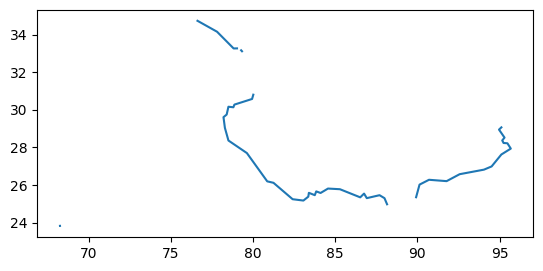

In [13]:
#Para los rios de India
rivers_india = gpd.clip(gdf=rivers,
                               mask=india)
rivers_india.plot()

C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

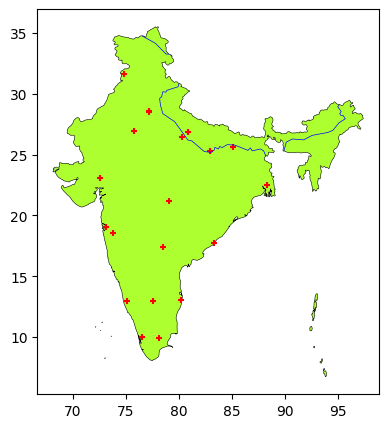

In [14]:
base = india.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_india.plot(marker='+', color='red', markersize=15,ax=base)
rivers_india.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [16]:
#Coordenadas de la India
india_coord=[13.56667, -15.75]

In [17]:
india.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [18]:
india.centroid

C:\Users\Enrique\AppData\Local\Temp\ipykernel_14128\2394425128.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  india.centroid


104    POINT (79.61623 22.88360)
dtype: geometry

In [19]:
india.to_crs(24378).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [20]:
india.to_crs(24378).centroid

104    POINT (3941793.374 -124769.745)
dtype: geometry

C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

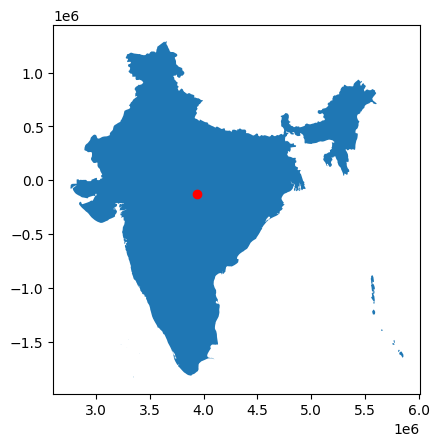

In [22]:
# replotting:
base24378=india.to_crs(24378).plot()
india.to_crs(24378).centroid.plot(color='red',ax=base24378)

In [23]:
india_24378=india.to_crs(24378)
# just Brazil

cities_india=cities[cities.COUNTRY=='India']
cities_24378=cities_india.to_crs(india_24378.crs)

rivers_24378=rivers.to_crs(india_24378.crs)
rivers_24378=gpd.clip(gdf=rivers_24378,mask=india_24378)

C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

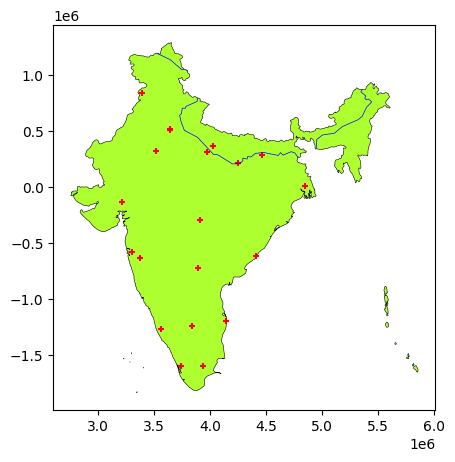

In [24]:
base = india_24378.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_24378.plot(marker='+', color='red', markersize=15,ax=base)
rivers_24378.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [ ]:
#IMPORTAR

C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\Enrique\anaconda3\envs\new1\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


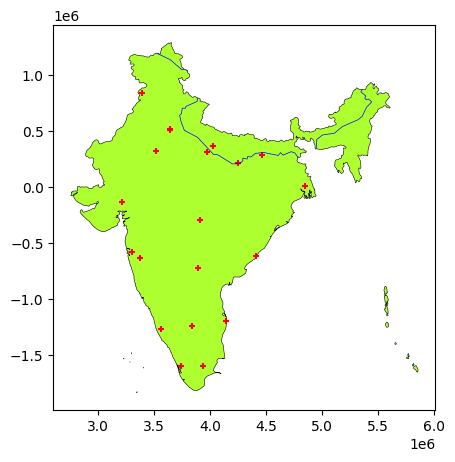

In [25]:
import matplotlib.pyplot as plt

base = india_24378.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_24378.plot(marker='+', color='red', markersize=15,ax=base)
mapEnd=rivers_24378.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("figures",'mapIndia.jpg'))

In [26]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

AttributeError: module 'pandas' has no attribute 'Int64Index'